In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/dataset2'

/content/drive/MyDrive/dataset2


In [ ]:
!unzip -qq '/content/drive/MyDrive/dataset2/model_2s.zip'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Flatten, BatchNormalization
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.utils.np_utils import to_categorical

In [ ]:
data_total  = pd.read_csv('/content/drive/MyDrive/dataset2/total_band.csv', header=None)

In [ ]:
data_total=data_total.sample(frac=1)

In [ ]:
data_train=data_total.iloc[0:14400, :]
data_val=data_total.iloc[14400:16200, :]
data_test=data_total.iloc[16200:18000,:]

In [ ]:
y_train = to_categorical(data_train[512])
y_test = to_categorical(data_test[512])
y_val = to_categorical(data_val[512])

In [ ]:
data_train.drop([512], axis=1, inplace=True)
data_test.drop([512], axis=1, inplace=True)
data_val.drop([512], axis=1, inplace=True)
data_train

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
11265,0.181525,0.202547,0.220932,0.234269,0.240808,0.239726,0.231275,0.216766,0.198371,0.178760,...,-0.128898,-0.136076,-0.138960,-0.137700,-0.132978,-0.125906,-0.117922,-0.110644,-0.105692,-0.104433
7796,-0.102082,-0.051131,-0.005385,0.029086,0.049328,0.055507,0.050268,0.037729,0.022381,0.008148,...,-0.029879,-0.030149,-0.030856,-0.031591,-0.031931,-0.031552,-0.030297,-0.028168,-0.025272,-0.021731
9563,0.056553,0.074300,0.092513,0.110471,0.127462,0.142886,0.156370,0.167844,0.177549,0.185956,...,-0.029445,-0.035005,-0.038878,-0.040372,-0.039242,-0.035758,-0.030641,-0.024899,-0.019596,-0.015613
14538,-0.063500,-0.052318,-0.042071,-0.033732,-0.028173,-0.026045,-0.027632,-0.032738,-0.040641,-0.050176,...,-0.109039,-0.105962,-0.102021,-0.097618,-0.093261,-0.089519,-0.086952,-0.086008,-0.086927,-0.089672
3019,0.135073,0.149334,0.163335,0.176782,0.189518,0.201508,0.212807,0.223502,0.233649,0.243212,...,0.323524,0.285463,0.218159,0.131359,0.037840,-0.049131,-0.118350,-0.162643,-0.179825,-0.172522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,-0.067735,-0.065806,-0.063513,-0.060990,-0.058453,-0.056174,-0.054439,-0.053477,-0.053402,-0.054158,...,-0.108012,-0.104863,-0.102909,-0.101926,-0.101481,-0.101056,-0.100197,-0.098638,-0.096375,-0.093669
10555,-0.053294,-0.063316,-0.070663,-0.074391,-0.074475,-0.071949,-0.068823,-0.067749,-0.071433,-0.081859,...,-0.051410,-0.054620,-0.064556,-0.080905,-0.101211,-0.120824,-0.133369,-0.131775,-0.109746,-0.063398
6659,0.096897,0.085773,0.072722,0.057927,0.041785,0.024898,0.008039,-0.007928,-0.022153,-0.033918,...,0.085148,0.092820,0.100670,0.108589,0.116431,0.124021,0.131165,0.137671,0.143347,0.147994
14450,-0.273493,-0.206875,-0.160012,-0.130697,-0.114818,-0.107452,-0.103895,-0.100404,-0.094589,-0.085428,...,0.172882,0.177895,0.179255,0.177130,0.172084,0.164932,0.156555,0.147706,0.138836,0.130006


In [ ]:
X_train=data_train.values
X_test=data_test.values
X_val=data_val.values

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(14400, 512)
(1800, 512)
(1800, 512)
(14400, 101)
(1800, 101)
(1800, 101)


In [ ]:
X_train = X_train.reshape(14400, 512, 1)
X_test = X_test.reshape(1800, 512, 1)
X_val = X_val.reshape(1800, 512, 1)
X_train.shape, X_test.shape, X_val.shape

((14400, 512, 1), (1800, 512, 1), (1800, 512, 1))

In [ ]:
def model():
  model = Sequential()
  model.add(Conv1D(256, 8, padding='same', activation='relu', input_shape= (512,1)))
  model.add(MaxPooling1D())
  model.add(Conv1D(256, 8, padding='same', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same',activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(101, activation='softmax')) # activation='softmax'

  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

In [ ]:
model = model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 512, 256)          2304      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 256, 256)         0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 256, 256)          524544    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 128, 256)         0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 128, 64)           131136    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 64, 64)          

In [ ]:
history = model.fit(X_train, y_train, batch_size = 450, epochs = 1000, verbose = 1, validation_data=(X_val, y_val))

Epoch 1/1000
32/32 [==============================] - 16s 164ms/step - loss: 0.0097 - accuracy: 0.0301 - val_loss: 0.0098 - val_accuracy: 0.0244
Epoch 2/1000
32/32 [==============================] - 5s 155ms/step - loss: 0.0092 - accuracy: 0.1258 - val_loss: 0.0098 - val_accuracy: 0.0289
Epoch 3/1000
32/32 [==============================] - 5s 159ms/step - loss: 0.0081 - accuracy: 0.3208 - val_loss: 0.0097 - val_accuracy: 0.0406
Epoch 4/1000
32/32 [==============================] - 5s 159ms/step - loss: 0.0065 - accuracy: 0.4924 - val_loss: 0.0098 - val_accuracy: 0.0444
Epoch 5/1000
32/32 [==============================] - 5s 155ms/step - loss: 0.0047 - accuracy: 0.6539 - val_loss: 0.0098 - val_accuracy: 0.0628
Epoch 6/1000
32/32 [==============================] - 5s 158ms/step - loss: 0.0030 - accuracy: 0.7939 - val_loss: 0.0095 - val_accuracy: 0.0967
Epoch 7/1000
32/32 [==============================] - 5s 153ms/step - loss: 0.0018 - accuracy: 0.8798 - val_loss: 0.0083 - val_accuracy

In [ ]:
model.save('bandpass.h5')

In [ ]:
model.evaluate(X_test, y_test)

57/57 [==============================] - 1s 8ms/step - loss: 4.5365e-04 - accuracy: 0.9672


[0.0004536484775599092, 0.9672222137451172]

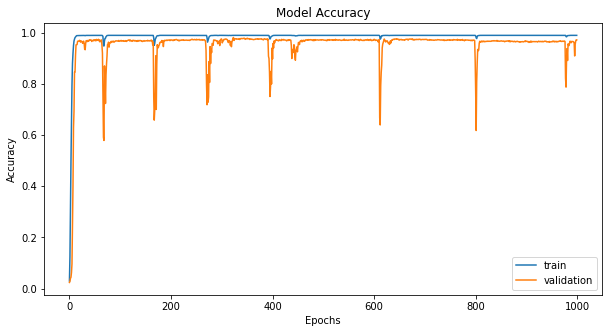

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='best')
plt.show()

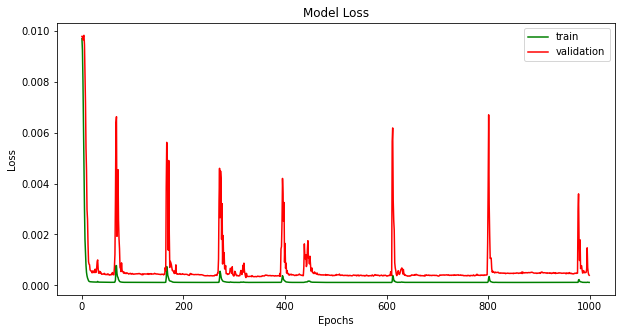

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], color = 'g')
plt.plot(history.history['val_loss'], color = 'r')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='best')
plt.show()

# h

In [ ]:
data_total = pd.read_csv('/content/drive/MyDrive/dataset2/total_high.csv', header=None)

In [ ]:
data_total=data_total.sample(frac=1)

In [ ]:
data_train=data_total.iloc[0:14400, :]
data_val=data_total.iloc[14400:16200, :]
data_test=data_total.iloc[16200:18000,:]

In [ ]:
y_train = to_categorical(data_train[512])
y_test = to_categorical(data_test[512])
y_val = to_categorical(data_val[512])

In [ ]:
data_train.drop([512], axis=1, inplace=True)
data_test.drop([512], axis=1, inplace=True)
data_val.drop([512], axis=1, inplace=True)
data_train

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
1261,0.014672,-0.004727,0.026393,0.033194,0.031614,0.045025,0.037017,0.048008,0.033120,0.030541,...,-0.047331,-0.045805,-0.053409,-0.021872,-0.035056,-0.025731,-0.036385,-0.035449,-0.028424,-0.034888
1530,-0.129187,-0.084060,-0.103484,-0.139098,-0.137242,-0.112466,-0.112519,-0.071083,-0.019037,0.089839,...,-0.048929,-0.058406,-0.039683,-0.033810,-0.030508,-0.019097,0.007914,-0.028295,-0.021435,-0.046196
8660,0.019837,0.026600,0.038222,0.002765,-0.025323,-0.048601,-0.072939,-0.042538,-0.016616,-0.044705,...,0.005059,-0.020296,-0.038742,-0.013837,0.019687,-0.037219,0.015734,-0.012592,0.004001,0.028174
3335,-0.070289,-0.048714,-0.068510,-0.057786,-0.056352,-0.044709,-0.095345,-0.072682,-0.070568,-0.099245,...,-0.071614,-0.066685,-0.062886,-0.051997,-0.070188,-0.068408,-0.090049,-0.054408,-0.067438,-0.055018
15374,0.153578,0.141458,0.143438,0.099047,0.096935,-0.001657,0.076451,0.019218,0.055965,0.005571,...,-0.012537,-0.014709,-0.008970,-0.010880,-0.032079,-0.026468,-0.085345,-0.081122,-0.056407,-0.058972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7172,-0.069395,-0.072609,-0.052504,-0.101888,-0.071502,-0.050676,-0.075950,-0.082454,-0.074798,-0.078871,...,0.017023,-0.000395,-0.006872,0.005280,-0.013057,-0.059054,-0.079312,-0.063599,-0.090236,-0.069713
13359,-0.018979,-0.036711,0.005377,-0.003385,0.025774,0.031232,-0.017009,-0.022240,0.016160,0.006259,...,0.120294,0.145116,0.116011,0.155306,0.129553,0.119402,0.075262,0.084423,0.087735,0.059849
4748,-0.347195,-0.303469,-0.240144,-0.192018,-0.177192,-0.074766,-0.135041,-0.035315,-0.062890,-0.102865,...,-0.134226,-0.109960,-0.085893,-0.115227,-0.124261,-0.054094,-0.101828,-0.113662,-0.130796,-0.138130
7069,-0.055650,-0.024855,-0.048721,0.021251,0.001591,-0.025180,-0.014352,-0.042776,-0.017652,-0.056089,...,-0.089395,-0.052743,-0.108557,-0.096069,-0.103208,-0.090314,-0.077627,-0.079947,-0.055984,-0.052898


In [ ]:
X_train=data_train.values
X_test=data_test.values
X_val=data_val.values

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(14400, 512)
(1800, 512)
(1800, 512)
(14400, 101)
(1800, 101)
(1800, 101)


In [ ]:
X_train = X_train.reshape(14400, 512, 1)
X_test = X_test.reshape(1800, 512, 1)
X_val = X_val.reshape(1800, 512, 1)
X_train.shape, X_test.shape, X_val.shape

((14400, 512, 1), (1800, 512, 1), (1800, 512, 1))

In [ ]:
def model():
  model = Sequential()
  model.add(Conv1D(256, 8, padding='same', activation='relu', input_shape= (512,1)))
  model.add(MaxPooling1D())
  model.add(Conv1D(256, 8, padding='same', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same',activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(101, activation='softmax')) # activation='softmax'

  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

In [ ]:
model = model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 512, 256)          2304      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 256, 256)         0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 256, 256)          524544    
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 128, 256)         0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 128, 64)           131136    
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 64, 64)          

In [ ]:
history = model.fit(X_train, y_train, batch_size = 450, epochs = 1000, verbose = 1, validation_data=(X_val, y_val))

Epoch 1/1000
32/32 [==============================] - 6s 161ms/step - loss: 0.0097 - accuracy: 0.0287 - val_loss: 0.0098 - val_accuracy: 0.0139
Epoch 2/1000
32/32 [==============================] - 5s 160ms/step - loss: 0.0092 - accuracy: 0.1377 - val_loss: 0.0098 - val_accuracy: 0.0339
Epoch 3/1000
32/32 [==============================] - 5s 161ms/step - loss: 0.0075 - accuracy: 0.3762 - val_loss: 0.0096 - val_accuracy: 0.0678
Epoch 4/1000
32/32 [==============================] - 5s 159ms/step - loss: 0.0052 - accuracy: 0.6176 - val_loss: 0.0096 - val_accuracy: 0.0939
Epoch 5/1000
32/32 [==============================] - 5s 160ms/step - loss: 0.0033 - accuracy: 0.7743 - val_loss: 0.0098 - val_accuracy: 0.0922
Epoch 6/1000
32/32 [==============================] - 5s 160ms/step - loss: 0.0020 - accuracy: 0.8731 - val_loss: 0.0083 - val_accuracy: 0.2383
Epoch 7/1000
32/32 [==============================] - 5s 164ms/step - loss: 0.0012 - accuracy: 0.9220 - val_loss: 0.0080 - val_accuracy:

In [ ]:
model.save('highpass.h5')

In [ ]:
model.evaluate(X_test, y_test)

57/57 [==============================] - 1s 6ms/step - loss: 2.1537e-04 - accuracy: 0.9867


[0.00021536996064241976, 0.9866666793823242]

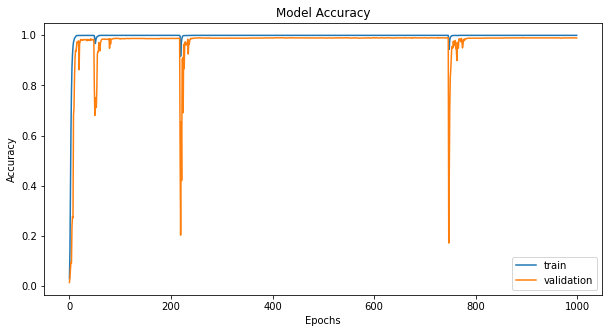

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='best')
plt.show()

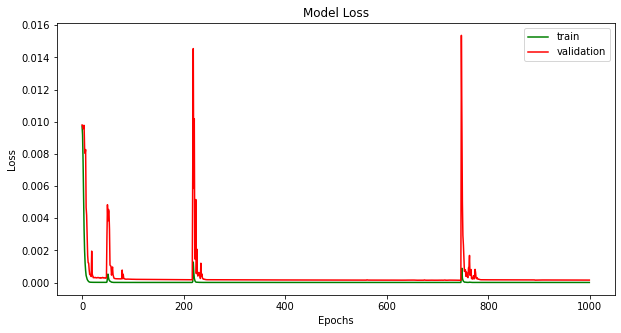

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], color = 'g')
plt.plot(history.history['val_loss'], color = 'r')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='best')
plt.show()

# l

In [8]:
data_total = pd.read_csv('/content/drive/MyDrive/dataset2/total_low.csv', header=None)

In [9]:
data_total=data_total.sample(frac=1)

In [10]:
data_train=data_total.iloc[0:14400, :]
data_val=data_total.iloc[14400:16200, :]
data_test=data_total.iloc[16200:18000,:]

In [11]:
y_train = to_categorical(data_train[512])
y_test = to_categorical(data_test[512])
y_val = to_categorical(data_val[512])

In [12]:
data_train.drop([512], axis=1, inplace=True)
data_test.drop([512], axis=1, inplace=True)
data_val.drop([512], axis=1, inplace=True)
data_train

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
15955,1.603778,1.603826,1.603684,1.603472,1.603305,1.603234,1.603231,1.603213,1.603097,1.602852,...,1.615061,1.612130,1.610961,1.612124,1.615468,1.620346,1.625899,1.631311,1.636002,1.639718
2336,1.656460,1.662421,1.669621,1.677698,1.686295,1.695060,1.703602,1.711463,1.718106,1.722938,...,1.388821,1.326901,1.299602,1.305771,1.339199,1.390437,1.448998,1.505431,1.552833,1.587560
14142,1.573025,1.573207,1.573726,1.574582,1.575668,1.576762,1.577550,1.577688,1.576875,1.574947,...,1.585587,1.586614,1.589900,1.595779,1.603963,1.613633,1.623628,1.632708,1.639814,1.644284
1383,1.606355,1.605682,1.604803,1.603652,1.602267,1.600803,1.599507,1.598662,1.598521,1.599233,...,1.630099,1.630600,1.631907,1.633613,1.635290,1.636624,1.637524,1.638166,1.638953,1.640409
13730,1.601280,1.595498,1.591137,1.588181,1.586582,1.586254,1.587051,1.588760,1.591090,1.593682,...,1.612906,1.611764,1.609915,1.607824,1.606065,1.605180,1.605558,1.607353,1.610481,1.614674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12424,1.437838,1.400833,1.373366,1.357046,1.351424,1.354381,1.362775,1.373169,1.382484,1.388478,...,1.412810,1.415725,1.427898,1.451309,1.486462,1.531935,1.584287,1.638397,1.688221,1.727814
16688,1.591929,1.596316,1.602062,1.608764,1.615951,1.623149,1.629927,1.635942,1.640963,1.644898,...,1.711553,1.719814,1.726965,1.732732,1.737126,1.740436,1.743168,1.745962,1.749480,1.754292
3050,1.654057,1.659189,1.662047,1.662157,1.659470,1.654431,1.647948,1.641242,1.635592,1.632013,...,1.621762,1.623607,1.624228,1.623590,1.621740,1.618828,1.615113,1.610941,1.606701,1.602750
14987,1.765431,1.776619,1.787633,1.798639,1.809914,1.821818,1.834748,1.849091,1.865137,1.882997,...,1.798587,1.818713,1.838683,1.857867,1.875556,1.891031,1.903637,1.912867,1.918414,1.920213


In [13]:
X_train=data_train.values
X_test=data_test.values
X_val=data_val.values

In [14]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(14400, 512)
(1800, 512)
(1800, 512)
(14400, 101)
(1800, 101)
(1800, 101)


In [15]:
X_train = X_train.reshape(14400, 512, 1)
X_test = X_test.reshape(1800, 512, 1)
X_val = X_val.reshape(1800, 512, 1)
X_train.shape, X_test.shape, X_val.shape

((14400, 512, 1), (1800, 512, 1), (1800, 512, 1))

In [16]:
def model():
  model = Sequential()
  model.add(Conv1D(256, 8, padding='same', activation='relu', input_shape= (512,1)))
  model.add(MaxPooling1D())
  model.add(Conv1D(256, 8, padding='same', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same',activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(101, activation='softmax')) # activation='softmax'

  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

In [17]:
model = model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 512, 256)          2304      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 256, 256)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 256, 256)          524544    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 128, 256)         0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 128, 64)           131136    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 64, 64)           0

In [18]:
history = model.fit(X_train, y_train, batch_size = 450, epochs = 1000, verbose = 1, validation_data=(X_val, y_val))

Epoch 1/1000
32/32 [==============================] - 15s 149ms/step - loss: 0.0098 - accuracy: 0.0165 - val_loss: 0.0098 - val_accuracy: 0.0056
Epoch 2/1000
32/32 [==============================] - 5s 143ms/step - loss: 0.0098 - accuracy: 0.0251 - val_loss: 0.0098 - val_accuracy: 0.0061
Epoch 3/1000
32/32 [==============================] - 5s 147ms/step - loss: 0.0097 - accuracy: 0.0401 - val_loss: 0.0098 - val_accuracy: 0.0167
Epoch 4/1000
32/32 [==============================] - 5s 148ms/step - loss: 0.0095 - accuracy: 0.0894 - val_loss: 0.0100 - val_accuracy: 0.0128
Epoch 5/1000
32/32 [==============================] - 5s 144ms/step - loss: 0.0093 - accuracy: 0.1397 - val_loss: 0.0098 - val_accuracy: 0.0161
Epoch 6/1000
32/32 [==============================] - 5s 152ms/step - loss: 0.0091 - accuracy: 0.1822 - val_loss: 0.0100 - val_accuracy: 0.0217
Epoch 7/1000
32/32 [==============================] - 5s 145ms/step - loss: 0.0088 - accuracy: 0.2368 - val_loss: 0.0099 - val_accuracy

In [19]:
model.save('lowpass.h5')

In [20]:
model.evaluate(X_test, y_test)

57/57 [==============================] - 1s 7ms/step - loss: 5.6682e-04 - accuracy: 0.9650


[0.0005668153753504157, 0.9649999737739563]

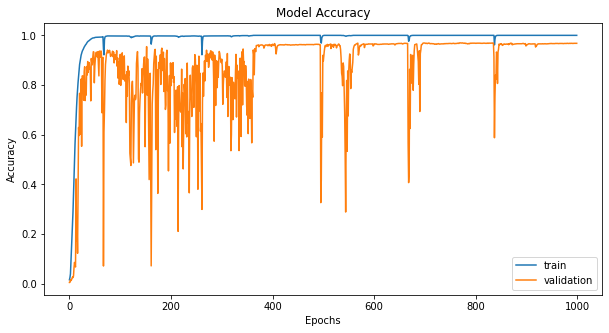

In [21]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='best')
plt.show()

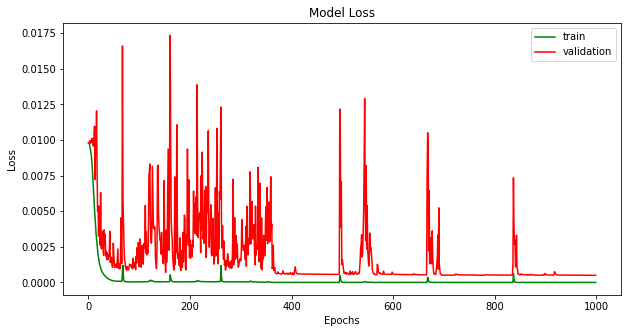

In [22]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], color = 'g')
plt.plot(history.history['val_loss'], color = 'r')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='best')
plt.show()